<a href="https://colab.research.google.com/github/bavel4885/python_test/blob/main/class_7_Unsupervised_learning_K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

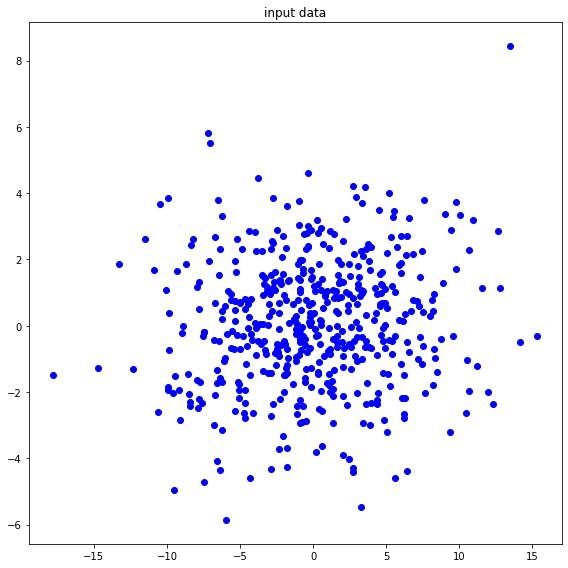

In [8]:
x = 5 * np.random.randn(500)
y = 2 * np.random.randn(500)

feature = np.zeros((500,2))
feature[:, 0] = x 
feature[:, 1] = y 


plt.figure(figsize = (8,8))
plt.title('input data')

plt.scatter(x,y, color='blue')


plt.tight_layout()


In [9]:
num_data = np.size(feature, axis=0)
num_feature = np.size(feature, axis=1)

print(f'number of data:  {num_data}')
print(f'number of feature:  {num_feature}')


number of data:  500
number of feature:  2


In [10]:
cluster_k = 2
iteration = 10
loss = np.zeros(iteration)
label_pred =  np.random.randint(0, cluster_k, size=(num_data))
distance = np.zeros((num_data, cluster_k))
distance.shape

(500, 2)

In [11]:
center = np.zeros(shape=(cluster_k, num_feature))
cluster_1 = feature[np.where(label_pred==0)]
center[0] = np.sum(cluster_1,axis=0) / len(cluster_1)
cluster_2 = feature[np.where(label_pred==1)]
center[1] = np.sum(cluster_2,axis=0) / len(cluster_2)
center

array([[-0.0222706 , -0.13339172],
       [-0.0532651 ,  0.28186412]])

In [12]:
loss_1 = np.sum((feature-center[0])**2, axis=1)
loss_2 = np.sum((feature-center[1])**2, axis=1)

In [13]:
distance[:, 0] = loss_1
distance[:, 1] = loss_2

In [14]:
label_pred = np.argmin(distance, axis=1)
label_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [20]:
center = np.zeros(shape=(cluster_k, num_feature))
distance = np.zeros(shape=(num_data, cluster_k))
temp_center = np.zeros(shape=(cluster_k, num_feature))

for i in range(iteration):
  for j in range(cluster_k):
    cluster = feature[np.where(label_pred==j)]
    center[j] = np.sum(cluster, axis=0) / len(cluster)
    distance[:,j] = np.sum((feature - center[j]) **2, axis=1)


  label_pred = np.argmin(distance, axis=1)

  loss[i] = sum(distance[range(num_data), label_pred]) / num_data
 

In [18]:
print(loss)

[26.05500099 15.43166947 13.59420188 13.58424703 13.58424703 13.58424703
 13.58424703 13.58424703 13.58424703 13.58424703]


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_cluster = 2)
